# 인덱스

* 데이터를 빠르게 찾을 수 있도록 도와주는 도구
* **클러스터형 인덱스**: 기본 키로 지정하면 자동 생성되며 테이블에 1개만 만들 수 있다.
* **보조 인덱스**: 고유 키로 지정하면 자동 생성되며 여러 개를 만들 수 있지만 자동 정렬되지는 않는다.

## 인덱스의 개념

* 책을 예로 들자면, 책의 내용 중 'UNIQUE'에 대해 찾아보고 싶다면 책의 제일 뒤에 있는 '찾아보기'를 열어볼 것이다.
* 찾아보기는 ABC 또는 가나다 순으로 이미 정렬되어 있어 'U'부분을 살펴보면 쉽게 'UNIQUE'단어를 찾을 수 있고, 단어 옆에 본문의 페이지 번호가 적혀 있어서 원하는 내용으로 빨리 이동할 수 있다.
* 찾아보기가 없는 경우엔 책을 첫 페이지부터 넘겨가며 확인하는 수 밖에 없을것이다.

### 인덱스의 문제점

* 찾아보기에 만들지 않아도 될 단어들이 쌓이면 쓸데 없이 책의 두께만 두꺼워지고, 찾아보기를 사용했는데도 단어를 찾는 시간이 찾아보기를 사용하지 않을 때보다 오히려 더 오래 걸릴 수도 있다.
* 실무에서도 필요 없는 인덱스를 만들게 된다면 데이터베이스가 차지하는 공간만 더 늘어나고, 인덱스를 이용해서 데이터를 찾는 것이 전체 테이블을 찾아보는 것보다 느려진다.

### 인덱스의 장점과 단점

#### 장점
* SELECT문으로 검색하는 속도가 매우 빨라진다.
* 그 결과 컴퓨터의 부담이 줄어들어서 결국 전체 시스템의 성능이 향상된다.

#### 단점
* 인덱스도 공간을 차지해서 데이터베이스 안에 추가적인 공간이 필요함(인덱스는 테이블 크기의 약 10% 정도의 공간이 추가로 필요)
* 처음에 인덱스를 만드는 데 시간이 오래 걸릴 수 있다.(찾아보기가 없는 책에 새로 찾아보기를 만드는 것과 마찬가지로 작업 시간이 필요)
* SELECT가 아닌 데이터의 변경 작업(INSERT, UPDATE, DELETE)이 자주 일어나면 오히려 성능이 나빠질 수 있다.

## 인덱스의 종류

* **클러스터형 인덱스**: 영어사전과 같이 책의 내용이 이미 알파벳 순서로 정렬되어 있는 것
* **보조 인덱스**: 책에 찾아보기가 별도로 있고, 찾아보기에서 해당 단어를 찾은 후에 옆에 표시된 페이지를 펼쳐야 실제 찾는 내용이 있는 것

### 자동으로 생성되는 인덱스

* 인덱스는 테이블의 열(컬럼) 단위에 생성되며, 하나의 열에는 하나의 인덱스를 생성할 수 있다.
* 하나의 열에 여러 개의 인덱스를 생성할 수도 있고, 여러 개의 열을 묶어서 하나의 인덱스를 생성할 수도 있지만 드문 경우이다.

* 앞서 회원 테이블 정의 시 회원 아이디(mem_id)를 기본 키로 정의했다. 이렇게 기본 키로 지정하면 자동으로 mem_id 옆에 클러스터형 인덱스가 생성된다.
* 그러나 기본 키는 테이블에 하나만 지정할 수 있다. -> 결국 클러스터형 인덱스는 테이블에 한 개만 만들 수 있다는 것이다.

In [ ]:
# 회원 테이블 정의 시에 선언한 SQL
CREATE TABLE member
(mem_id CHAR(8) NOT NULL PRIMARY KEY,
mem_name VARCHAR(10) NOT NULL,
mem_number INT NOT NULL,
...

In [ ]:
# 테이블을 만들고 첫 번째 열을 기본 키로 지정
USE market_db;
CREATE TABLE table1(
col1 INT PRIMARY KEY,
col2 INT,
col3 INT
);

In [ ]:
# SHOW INDEX문을 사용하여 인덱스 정보 확인
SHOW INDEX FROM table1;

* Key_name 부분을 보면 PRIMARY라고 되어있음 -> 기본 키로 설정해서 '자동으로 생성된 인덱스'라는 의미이다.
* 이것이 클러스터형 인덱스이다.
* Column_name이 col1로 설정되어 있다는 것은 col1 열에 인덱스가 만들어져 있다는 의미
* Non_unique는 '고유하지 않다'라는 뜻. 즉, 중복이 허용되냐는 것을 말한다. Unique가 0이라는 것은 False, 반대로 1은 True의 의미
* 결론적으로 이 인덱스는 중복이 허용되지 않는 인덱스이다.

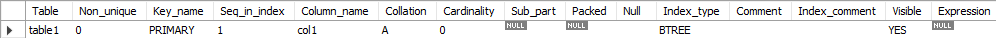

#### 고유 인덱스
* 고유 인덱스(Unique Index)는 인덱스의 값이 중복되지 않는다는 의미, 단순 인덱스(Non-Unique Index)는 인덱스의 값이 중복되어도 된다는 의미이다.
* 기본 키나 고유 키로 지정하면 값이 중복되지 않으므로 고유 인덱스가 생성된다. 그 외의 인덱스는 단순 인덱스로 생성됨

* 기본 키와 더불어 고유 키도 인덱스가 자동으로 생성된다.

In [ ]:
# 고유 키도 인덱스가 자동 생성된다
CREATE TABLE table2(
col1 INT PRIMARY KEY,
col2 INT UNIQUE,
col3 INT UNIQUE
);
SHOW INDEX FROM table2;

* Key_name에 열 이름이 써 있는 것은 보조 인덱스
* 보조 인덱스는 고유 키로 지정하면 자동으로 생성되며, 테이블당 여러 개 만들 수 있다.

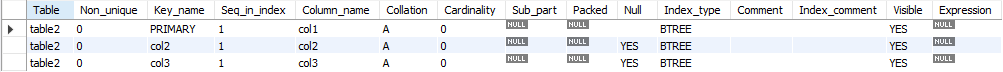

### 자동으로 정렬되는 클러스터형 인덱스

In [ ]:
# 클러스터형 인덱스 예시
USE market_db;
DROP TABLE IF EXISTS buy, member;
CREATE TABLE member
(mem_id CHAR(8),
mem_name VARCHAR(10),
mem_number INT,
addr CHAR(2)
);

In [ ]:
# 데이터 삽입
INSERT INTO member VALUES('TWC', '트와이스', 9, '서울');
INSERT INTO member VALUES('BLK', '블랙핑크', 4, '경남');
INSERT INTO member VALUES('WMN', '여자친구', 6, '경기');
INSERT INTO member VALUES('OMY', '오마이걸', 7, '서울');
SELECT * FROM member;

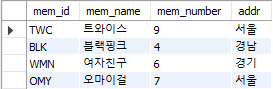

In [ ]:
# 아이디를 기준으로 정렬 순서 변경
ALTER TABLE member
ADD CONSTRAINT
PRIMARY KEY (mem_id);
SELECT * FROM member;

* mem_id 열을 기본 키로 지정했으므로 mem_id 열에 클러스터형 인덱스가 생성되어 mem_id 열을 기준으로 정렬되었다.
* 클러스터형 인덱스가 생성된 열로 데이터가 자동 정렬된다.

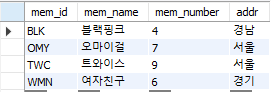

In [ ]:
# mem_id열의 Primary Key를 제거하고, mem_name열을 Primary Key로 지정
# 기본 키 제거
ALTER TABLE member DROP PRIMARY KEY;
ALTER TABLE member
# 클러스터형 인덱스 생성
ADD CONSTRAINT
PRIMARY KEY(mem_name);
SELECT * FROM member;

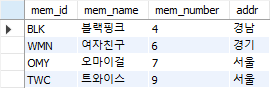

In [ ]:
# 추가로 데이터를 입력하면 알아서 기준에 맞춰 정렬된다
INSERT INTO member VALUES('GRL', '소녀시개', 8, '서울');
SELECT * FROM member;

* 클러스터형 인덱스는 테이블에 1개만 생성할 수 있다. 기본 키가 테이블에 1개인 것과 마찬가지이다.

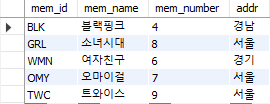

#### 기본 키 변경 시 주의할 점

* 이미 대용량의 데이터가 있는 상태에서 기본 키를 지정하면 시간이 매우 오래 걸릴 수 있다.
* 앞의 예시에선 회원 이름 열을 기본 키로 변경했지만, 논리적으로 위험함 -> 기본 키는 중복되지 않아야 하는데, 회원 이름은 당연히 중복될 수 있기 때문

### 정렬되지 않는 보조 인덱스

In [ ]:
# 보조 인덱스 예시
DROP TABLE IF EXISTS member;
CREATE TABLE member
(mem_id CHAR(8),
mem_name VARCHAR(10),
mem_number INT,
addr CHAR(2)
);

In [ ]:
# 데이터 입력
INSERT INTO member VALUES('TWC', '트와이스', 9, '서울');
INSERT INTO member VALUES('BLK', '블랙핑크', 4, '경남');
INSERT INTO member VALUES('WMN', '여자친구', 6, '경기');
INSERT INTO member VALUES('OMY', '오마이걸', 7, '서울');
SELECT * FROM member;

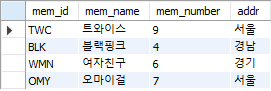

In [ ]:
# mem_id열을 고유 키로 설정하고 내용 확인
ALTER TABLE member
ADD CONSTRAINT
UNIQUE(mem_id);
SELECT * FROM member;

* 데이터의 순서엔 변화가 없다.
* 보조 인덱스를 생성해도 데이터의 순서는 변경되지 않고 별도로 인덱스를 만드는 것

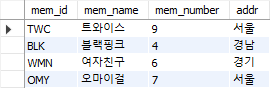

In [ ]:
# mem_name열에 추가로 고유 키 지정
ALTER TABLE member
ADD CONSTRAINT
UNIQUE(mem_name);
SELECT * FROM member;

* 결과를 보면 역시 데이터의 내용과 차례는 그대로이다.
* 현재는 mem_id 열과 mem_name 열에 모두 보조 인덱스가 생성된 상태이다.

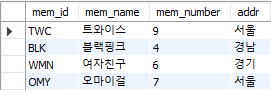

In [ ]:
# 데이터 추가 입력
INSERT INTO member VALUES('GRL', '소녀시대', 8, '서울');
SELECT * FROM member;

* 데이터를 추가로 입력하면 일반 책에 새로운 내용이 추가되면 본문의 제일 뒤에 추가되는 것과 동일

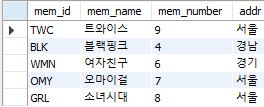

* 보조 인덱스는 여러 개 만들 수 있다. 고유 키를 테이블에 여러 개 지정하는 것과 마찬가지이다.
* 그러나 보조 인덱스를 만들 때마다 데이터베이스의 공간을 차지하게 되고, 전반적으로 시스템에 오히려 나쁜 영향을 미치게 된다.
* 그러므로 꼭 필요한 열에만 적절히 보조 인덱스를 생성하는 것이 좋다.